# Use Fashion MNIST dataset to illustrate this

In [53]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


# Import the Fashion MNIST dataset

In [54]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [56]:
train_images.shape

(60000, 28, 28)

In [57]:
len(train_labels)

60000

In [58]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [59]:
test_images.shape

(10000, 28, 28)

In [60]:
len(test_labels)

10000

In [61]:
# Scale these values to a range of 0 to 1 
# before feeding them to the neural network model. 
# To do so, divide the values by 255.
train_images = train_images / 255.0

test_images = test_images / 255.0

# Build the model

In [62]:
# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [63]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
# Train the model
history = model.fit(train_images, train_labels, validation_split=0.33, epochs=100)

Epoch 1/100
1257/1257 [==============================] - 4s 3ms/step - loss: 0.6830 - accuracy: 0.7658 - val_loss: 0.4368 - val_accuracy: 0.8469
Epoch 2/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.4082 - accuracy: 0.8528 - val_loss: 0.3844 - val_accuracy: 0.8629
Epoch 3/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.3580 - accuracy: 0.8716 - val_loss: 0.3647 - val_accuracy: 0.8651
Epoch 4/100
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3262 - accuracy: 0.8806 - val_loss: 0.3515 - val_accuracy: 0.8738
Epoch 5/100
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3110 - accuracy: 0.8834 - val_loss: 0.3375 - val_accuracy: 0.8799
Epoch 6/100
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2890 - accuracy: 0.8915 - val_loss: 0.3288 - val_accuracy: 0.8806
Epoch 7/100
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2719 - accuracy: 0.8977 - val_loss: 0.3354 - val_ac

1257/1257 [==============================] - 4s 3ms/step - loss: 0.0729 - accuracy: 0.9723 - val_loss: 0.5478 - val_accuracy: 0.8877
Epoch 58/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0751 - accuracy: 0.9722 - val_loss: 0.5352 - val_accuracy: 0.8894
Epoch 59/100
1257/1257 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9740 - val_loss: 0.5662 - val_accuracy: 0.8863
Epoch 60/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0708 - accuracy: 0.9736 - val_loss: 0.5572 - val_accuracy: 0.8882
Epoch 61/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0625 - accuracy: 0.9777 - val_loss: 0.5498 - val_accuracy: 0.8902
Epoch 62/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0690 - accuracy: 0.9747 - val_loss: 0.5697 - val_accuracy: 0.8873
Epoch 63/100
1257/1257 [==============================] - 3s 3ms/step - loss: 0.0662 - accuracy: 0.9755 - val_loss: 0.5603 - val_accuracy

In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


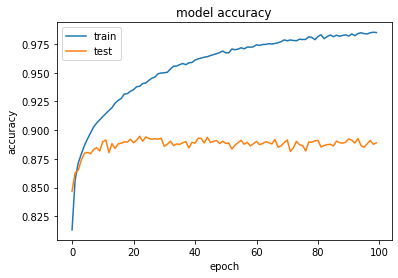

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy')

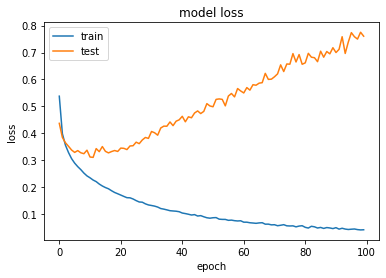

In [67]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss')

In [68]:
# Evaluate how the model performs on the test dataset (use accuracy)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8749 - accuracy: 0.8800

Test accuracy: 0.8799999952316284
